<h1 style="font-size: 40px;color: blue;align:center;">AI POWERED INTELLIGENT TOOL TANZATOUR-AI</h1>

<img src="https://projects.innocentcharles.com/assets/img/1_IGjAlZIUn0oga4pvfC6lfQ.png" width="10000px">

<h3>IMPORTING THE LIBRARY</h3>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

<h3>LOADING THE DATA</h3>

In [2]:
pd.set_option("display.max_columns",70000)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",90000)
data=pd.read_csv("Train.csv")
variable_definition=pd.read_csv("VariableDefinitions.csv")

<h3>EDA (EXPLORATORY DATA ANALYIS)</h3>

In [3]:
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
data.tail(10)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4799,tour_986,UNITED STATES OF AMERICA,65+,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,19.0,0.0,Cash,Yes,Wildlife,18232500.0
4800,tour_987,SINGAPORE,1-24,Friends/Relatives,1.0,1.0,Leisure and Holidays,Conference tourism,"Friends, relatives",Package Tour,Yes,Yes,No,Yes,No,Yes,No,14.0,2.0,Cash,Yes,Good service,9945000.0
4801,tour_989,ITALY,45-64,Friends/Relatives,1.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,5.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",2269330.0
4802,tour_99,KENYA,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,10.0,5.0,Cash,Yes,No comments,6464250.0
4803,tour_991,GERMANY,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,12.0,7.0,Cash,Yes,No comments,331500.0
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


In [5]:
variable_definition

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [6]:
data.isnull().sum()


ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

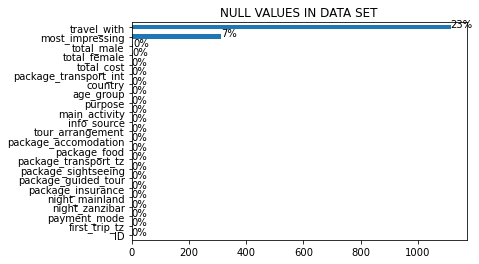

In [9]:
group=data.isnull().sum().sort_values().plot(kind="barh")
plt.title("NULL VALUES IN DATA SET")
for p in group.patches:
    z=((p.get_width()/data.shape[0])*100)
    per="{:,.0f}%".format(z)
    height=p.get_height()
    width=p.get_width()
    x=p.get_x()+width + 0.02 
    y=p.get_y()+height/2 
    plt.annotate(per,(x,y))


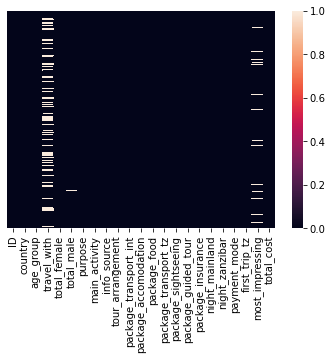

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,linecolor="yellow")
plt.show()

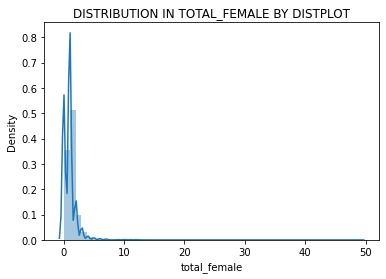

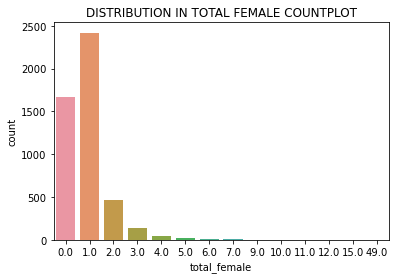

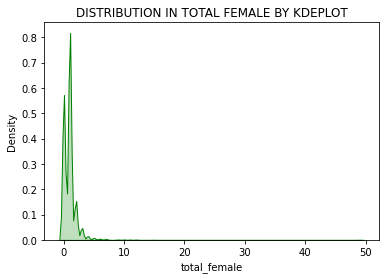

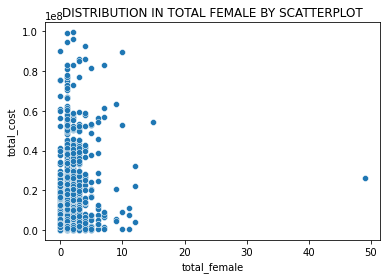

In [11]:
plt.title("DISTRIBUTION IN TOTAL_FEMALE BY DISTPLOT")
sns.distplot(data['total_female'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE COUNTPLOT")
sns.countplot(data['total_female'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE BY KDEPLOT")
sns.kdeplot(data['total_female'],shade=True,color="green")
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE BY SCATTERPLOT")
sns.scatterplot("total_female","total_cost",data=data)
plt.show()

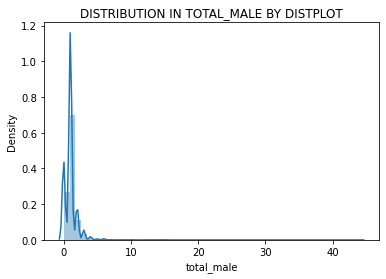

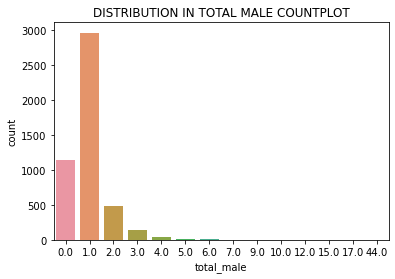

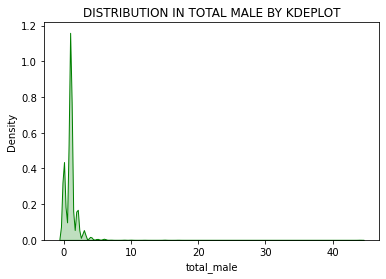

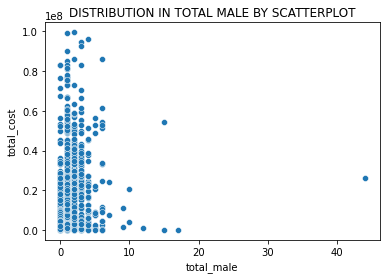

In [12]:
plt.title("DISTRIBUTION IN TOTAL_MALE BY DISTPLOT")
sns.distplot(data['total_male'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE COUNTPLOT")
sns.countplot(data['total_male'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE BY KDEPLOT")
sns.kdeplot(data['total_male'],shade=True,color="green")
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE BY SCATTERPLOT")
sns.scatterplot("total_male","total_cost",data=data)
plt.show()

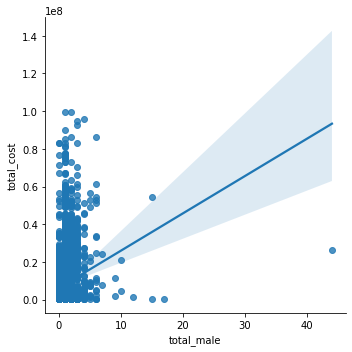

In [13]:

sns.lmplot("total_male","total_cost",data=data)
plt.show()

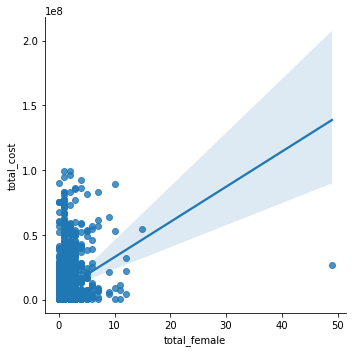

In [14]:

sns.lmplot("total_female","total_cost",data=data)
plt.show()

In [15]:
def outliers(data,variable):
    sns.boxenplot(data[variable])
    plt.show()

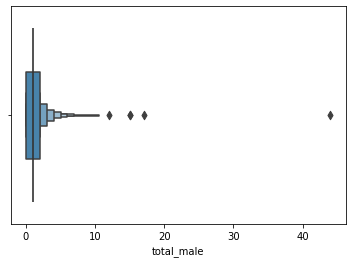

In [16]:
outliers(data,"total_male")

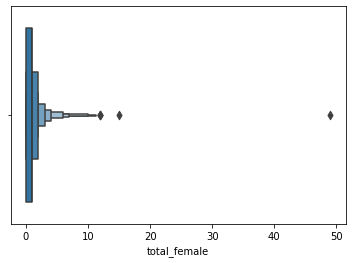

In [17]:
outliers(data,"total_female")

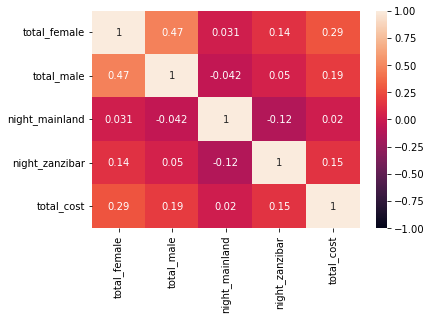

In [18]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [19]:
numerical_data=['total_female',"total_male"]
for x in numerical_data:
    data[x]=data[x].fillna(data[x].mode()[0])

In [20]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [21]:
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [22]:
categ_null_values=("travel_with","most_impressing")
for x in categ_null_values:
    data[x]=data[x].fillna("None")
    


In [23]:
data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [24]:
data.head(30)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,25-44,None,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,No,No,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,3480750.0
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,4.0,0.0,Cash,Yes,None,994500.0
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,5.0,0.0,Credit Card,Yes,Friendly People,2486250.0


In [25]:
for x in data.columns:
    l= len(data[x].unique())
    print(x,l)

ID 4809
country 105
age_group 4
travel_with 6
total_female 14
total_male 14
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 64
night_zanzibar 34
payment_mode 4
first_trip_tz 2
most_impressing 8
total_cost 1637


In [26]:
lab_encode=(
    "tour_arrangement",
    "package_transport_int",
    "package_accomodation",
    "package_food",
    "package_transport_tz",
    "package_sightseeing",  
    "package_guided_tour",
    "package_insurance",
    "first_trip_tz",
    "age_group",  
    "payment_mode"
)

In [27]:
encoder=LabelEncoder()
for x in lab_encode:
    data[x]=encoder.fit_transform(data[x])
    

In [28]:
data.dtypes

ID                        object
country                   object
age_group                  int64
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement           int64
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland           float64
night_zanzibar           float64
payment_mode               int64
first_trip_tz              int64
most_impressing           object
total_cost               float64
dtype: object

In [29]:
for x in data.columns:
    l=len(data[x].unique())
    print(x,l)

ID 4809
country 105
age_group 4
travel_with 6
total_female 14
total_male 14
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 64
night_zanzibar 34
payment_mode 4
first_trip_tz 2
most_impressing 8
total_cost 1637


In [30]:
colum_dummies=[
    "most_impressing",
    "info_source",  
    "main_activity",  
    "purpose",  
    "travel_with",  
    "country"
]

In [31]:
data=pd.get_dummies(data,columns=colum_dummies,drop_first=True)

In [32]:
data.head()

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BERMUDA,country_BRAZIL,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LITHUANIA,country_LUXEMBOURG,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_YEMEN,country_ZAMBIA,country_ZIMBABWE
0,tour_0,2,1.0,1.0,0,0,0,0,0,0,0,0,13.0,0.0,0,0,674602.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tour_10,1,1.0,0.0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,3214906.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,tour_1000,1,0.0,1.0,0,0,0,0,0,0,0,0,1.0,31.0,0,0,3315000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tour_1002,1,1.0,1.0,1,0,1

In [33]:
data.dtypes

ID                                                       object
age_group                                                 int64
total_female                                            float64
total_male                                              float64
tour_arrangement                                          int64
package_transport_int                                     int64
package_accomodation                                      int64
package_food                                              int64
package_transport_tz                                      int64
package_sightseeing                                       int64
package_guided_tour                                       int64
package_insurance                                         int64
night_mainland                                          float64
night_zanzibar                                          float64
payment_mode                                              int64
first_trip_tz                           

In [34]:
data['total_person']=data['total_male']+data['total_female']
data['total_person']=data['total_person'].astype("int")
data["total_nights_spent"]=data['night_mainland']+data['night_zanzibar']

In [35]:
data['total_female']=data['total_female'].astype("int")
data['total_male']=data['total_male'].astype('int')

In [36]:
data.dtypes

ID                                                       object
age_group                                                 int64
total_female                                              int64
total_male                                                int64
tour_arrangement                                          int64
package_transport_int                                     int64
package_accomodation                                      int64
package_food                                              int64
package_transport_tz                                      int64
package_sightseeing                                       int64
package_guided_tour                                       int64
package_insurance                                         int64
night_mainland                                          float64
night_zanzibar                                          float64
payment_mode                                              int64
first_trip_tz                           

In [37]:
data.head(10)

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BERMUDA,country_BRAZIL,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LITHUANIA,country_LUXEMBOURG,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,total_person,total_nights_spent
0,tour_0,2,1,1,0,0,0,0,0,0,0,0,13.0,0.0,0,0,674602.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0
1,tour_10,1,1,0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,3214906.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,21.0
2,tour_1000,1,0,1,0,0,0,0,0,0,0,0,1.0,31.0,0,0,3315000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [38]:
target=data['total_cost']
del data['total_cost']

In [39]:
target

0       6.746025e+05
1       3.214906e+06
2       3.315000e+06
3       7.790250e+06
4       1.657500e+06
5       1.209500e+05
6       4.661400e+05
7       3.480750e+06
8       9.945000e+05
9       2.486250e+06
10      1.117155e+06
11      8.121750e+06
12      3.315000e+05
13      1.134665e+07
14      4.972500e+05
15      3.315000e+05
16      2.000000e+06
17      3.315000e+05
18      2.269330e+06
19      3.775200e+05
20      7.112625e+05
21      4.972500e+05
22      7.458750e+06
23      3.734348e+06
24      5.673325e+06
25      4.000000e+05
26      6.630000e+05
27      4.538660e+05
28      2.544262e+07
29      6.961500e+06
30      1.707030e+06
31      5.690100e+06
32      2.652000e+06
33      2.320500e+06
34      4.267575e+06
35      1.731600e+07
36      6.630000e+05
37      3.812250e+06
38      8.287500e+05
39      3.000000e+06
40      8.287500e+05
41      2.845050e+07
42      7.458750e+05
43      3.273562e+06
44      3.397875e+06
45      6.132750e+06
46      4.992526e+06
47      1.588

In [40]:
del data['ID']

In [41]:
data.head()

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BERMUDA,country_BRAZIL,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LITHUANIA,country_LUXEMBOURG,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,total_person,total_nights_spent
0,2,1,1,0,0,0,0,0,0,0,0,13.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0
1,1,1,0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,21.0
2,1,0,1,0,0,0,0,0,0,0,0,1.0,31.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,32.0
3,1,1,1,1,0,1,1,1,1,1,0,11.0,0.0,0,1,0,1,0,0,0,0,0,0,0

In [42]:
data.shape,target.shape 

((4809, 154), (4809,))

In [43]:
error=[]
kfold=KFold(n_splits=4)
for train_index,test_index in kfold.split(data,target):
    x_train,x_test=data.iloc[train_index],data.iloc[test_index]
    y_train,y_test=target.iloc[train_index],target.iloc[test_index]
    model= CatBoostRegressor(verbose= False,random_seed= 1999, use_best_model=True, loss_function='MAE',n_estimators=1000, learning_rate=0.05)
    model.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)])
    y_preds=model.predict(x_test)
    mean_error=mean_absolute_error(y_test,y_preds)
    print("Error",mean_error)
    error.append(mean_error)
    # # final_preds=model.predict(test)
    # final+=final_preds
np.mean(error)

Error 5093568.020226895
Error 4788259.825827587
Error 5149832.221941999
Error 3662276.335726799


4673484.10093082

<AxesSubplot:>

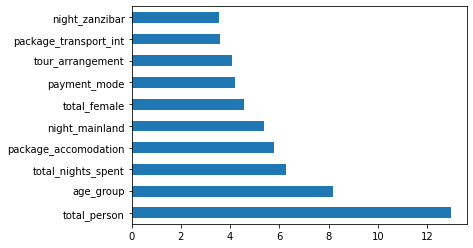

In [44]:
#Feature importance plot.
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(10).plot(kind='barh')